# Support Vector Machines

__objective__:
    -  Maximal Margin Classifier
    -  Soft Margin Classifier
    -  Example
    -  Kernels
  
__Note__: This notebook is adapted from ch:9 of ISLR. 
  
__Classification Algorithms__

 - Logistic Regression
 - Knn
 - Decision Trees 
 - Random Forests
  
## First a little bit prerequisite math

[line equation with desmos](https://www.desmos.com/calculator/tzz7jlc6vr)

[Plane equation with GeoGebra](https://www.geogebra.org/3d/pxwfdmdx)



## Maximal Margin Classifier

In classification one natural idea might be to try to find a hyperplane (line, plane, etc) that perfectly separates the classess.

<img src="img/maximal_margin_classifier.png" width=450, height=450> 


- Let's say we are lucky enough to find such plane then the question becomes among infinitely many planes that separates the classes which one is the 'best' choice.



__Maximal Margin Classifier__ addresses this problem by choosing the plane that maximizes the margin (furthest from the training observations).

<img src="img/support_vectors.png" width=450, height=450> 
 
__Q__: We have a little problem though! How can we find this, in other words, what is the problem that we would like to solve?

In fact, it is a very easy one:

<img src="img/constructing_maximal_margin.png" width=450, height=450> 


Notice that we can also write this problem as:

<img src="img/svc_problem.png" width=350, height=350> 


Before we dive into this problem, do you see why maximal margin classifier might be a problem?

# %load -r 1 supplement.py
<img src="img/problems_of_maximal_margin.png" width=450, height=450>

## Solution: Support Vector Classifier (soft margin classifier)


>  In fact, even if a separating hyper-plane does exist, then there are instances in which a classifier based on a separating hyperplane might not be desirable. A classifier based on a separating hyperplane will necessarily perfectly classify all of the training observations; this can lead to sensitivity to individual observations.

We will sacrifice the perfect separation for the sake of 

 - Robustness
 - Better test performance

__Q:__ How are we going to write this problem mathematically?
<img src="img/slack_variables.png" width=450, height=450> 

- $\xi_{i}$ are called slack variables and this problem is equivalent to: 



<img src="img/svc_slack.png" width=450, height=450> 

__Q__: Let's investigate the role of $\xi_{i}$:

- What happens if $\xi_{i} = 0$?

- What if $0<\xi_{i} < 1$?

- $\xi_{i} >1$


__Q__: How about the role of C?

- if C = 0 then what are the possible values for $\epsilon_{i}$?

- How many misclassification would be allowed if C > 0  and $\epsilon_{i} >1$?


__Note__: C is a hyper-parameter of the model so the best value of it determined by cross-validation. 

<img src="img/effect_of_C.png" width=450, height=450> 


Note that once this problem is solved than we will make predictions by the sign of: 

$$ f(x^{\ast}) = \beta_{0} + \beta_{1}x^{\ast}_{1} + \cdots + \beta_{p}x^{\ast}_{p}$$


__Q:__ Support Vector Classifiers a lot better than maximal margin classifiers but still not enough for most of the applications. Can you see why?

# %load -r 2 supplement.py
<img src="img/non_separable_case.png" width=450, height=450>

## Implementation & Comparison

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  

Download data from [this site](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [4]:
bankdata = pd.read_csv('data/data_banknote_authentication.txt', header=None)
bankdata.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# our data doesn't have header, so we will manually add that on 
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
bankdata.columns = headers

bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


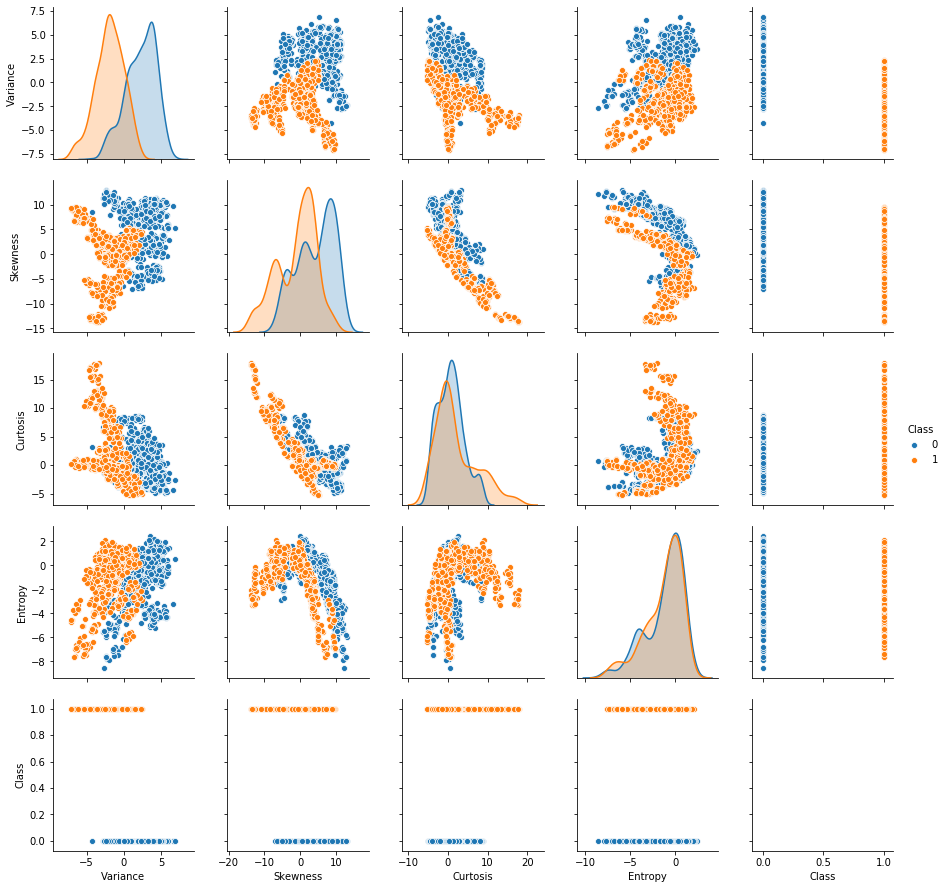

In [8]:
import seaborn as sns 

sns.pairplot(bankdata[["Variance", "Skewness", "Curtosis", "Entropy", 'Class']],
             hue = 'Class');

__Train-Test-Split__

In [9]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1029) 

In [10]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([608, 489]))

__Scaling Data__

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.model_selection import cross_validate

__Your Turn__ 

- Train a support vector classifier with 5 fold cross validation


In [16]:
# %load -r 4-15 supplement.py
# for more on possible values of scoring parameter
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
cv = cross_validate(svclassifier,
                    X_train,
                    y_train,
                    cv =5,
                    scoring= 'roc_auc',
                    return_estimator= True,
                    return_train_score= True,
                    n_jobs= -1)

In [19]:
print(cv['test_score'])
estimator = cv['estimator'][1]

y_pred = estimator.predict(X_train)


[0.99966544 1.         0.99983272 1.         1.        ]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(classification_report(y_train, y_pred)) 
print(f"The accuracy score is {accuracy_score(y_train, y_pred)}")


conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
conf_matrix


## https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       608
           1       0.98      1.00      0.99       489

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097

The accuracy score is 0.99179580674567


,predicted 0,predicted 1
actual 0,599,9
actual 1,0,489


In [ ]:
## Let's check the documentation
## https://scikit-learn.org/stable/modules/svm.html#classification
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

!! Wait a minute: The title of the lecture is Support vector machines but we didn't see them yet?


### Support Vector Machines

- Very basic idea: Transform the inputs into another space!!

 - Add higher orders (More Features)
 - Find smart transformations

### Further Resources:

[Cornell - Machine Learning](https://www.youtube.com/watch?v=FgTQG2IozlM)

[Andrew Ng - SVM - RBF kernel-1](https://www.youtube.com/watch?v=mTyT-oHoivA)

[Andrew Ng - SVM - Kernels and practical advices-III](https://www.youtube.com/watch?v=FCUBwP-JTsA)

Also, read ch: 9.3 from ISLR. If you want more technical explanation read 12.2 and 12.3 from Elements of Statistical Learning.